In [1]:
from numpy import *
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Find out the number of observations and columns?

In [2]:
HR = pd.read_csv('E:\EDA\EDA_Chennai_Final/HR_comma_sep.csv',sep = ',')
HR.shape

(14999, 10)

In [4]:
HR.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## 2. Check for the missing values?

In [7]:
HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [27]:
HR.rename(columns={'sales':'department'},inplace=True)
HR.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [12]:
HR['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

## 3. Create a bar chart for finding the department strength?

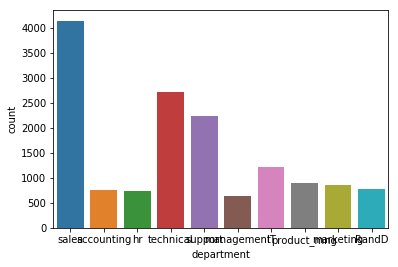

In [19]:
figsize=(100,10)
sns.countplot(x='department',data=HR)

In [60]:
HR.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


## 4. Create a bar chart to find the experience in the company?

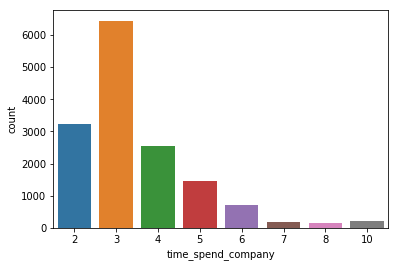

In [61]:
sns.countplot(x='time_spend_company',data=HR)

## 5. Create a bar chart to find the average monthly hours spent by employee?

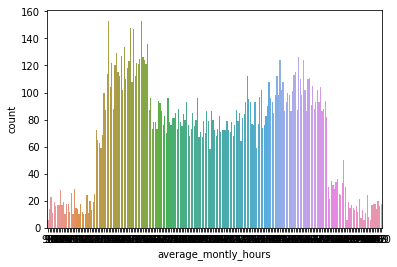

In [24]:
sns.countplot(x='average_montly_hours',data=HR)

## 6. Create a histogram for satisfaction level?

C:\Users\VIGNESH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


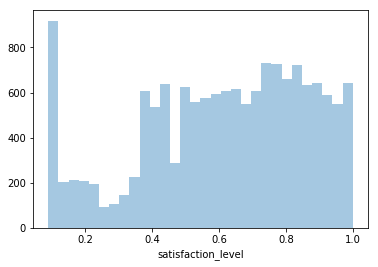

In [64]:
sns.distplot(HR['satisfaction_level'],kde=False)
plt.show()

## 7. Create a histogram for number of projects?

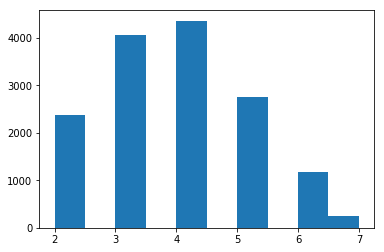

In [63]:
plt.hist(HR['number_project'])
plt.show()

In [65]:
HR.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## 8. Create a bar chart for salary-wise attrition(low, medium and high)?

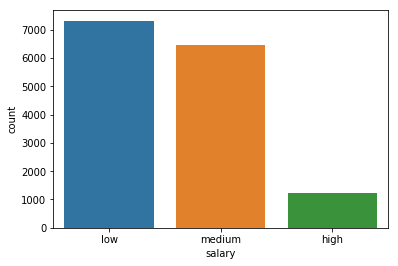

In [34]:
sns.countplot(HR['salary'])

## 10. How many employees got promoted in the last 5 years? 

In [52]:
a=HR['promotion_last_5years']
a[a==1].count()

319

## 9. How many employees have left the company? 


In [66]:
a=HR['left']
a[a==1].count()

3571

## 11. How many employees had suffered from work accidents? 


In [55]:
b=HR['Work_accident']
b[b==1].count()

2169

## 12. How many employees are present in each department? 


In [68]:
x=HR.groupby('department')
x['department'].count()

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: department, dtype: int64

## 13. How many employees are present in different salary ranges(high, low, medium)?


In [70]:
x=HR.groupby(['department','salary'])
x['department'].count()

department   salary
IT           high        83
             low        609
             medium     535
RandD        high        51
             low        364
             medium     372
accounting   high        74
             low        358
             medium     335
hr           high        45
             low        335
             medium     359
management   high       225
             low        180
             medium     225
marketing    high        80
             low        402
             medium     376
product_mng  high        68
             low        451
             medium     383
sales        high       269
             low       2099
             medium    1772
support      high       141
             low       1146
             medium     942
technical    high       201
             low       1372
             medium    1147
Name: department, dtype: int64

## 14. How many employees of each salary range are present in different departments? 


In [72]:
x=HR.groupby(['salary','department'])
x['department'].count()

salary  department 
high    IT               83
        RandD            51
        accounting       74
        hr               45
        management      225
        marketing        80
        product_mng      68
        sales           269
        support         141
        technical       201
low     IT              609
        RandD           364
        accounting      358
        hr              335
        management      180
        marketing       402
        product_mng     451
        sales          2099
        support        1146
        technical      1372
medium  IT              535
        RandD           372
        accounting      335
        hr              359
        management      225
        marketing       376
        product_mng     383
        sales          1772
        support         942
        technical      1147
Name: department, dtype: int64

## 15. How many employees got promoted in different departments? 

In [74]:
a=HR['promotion_last_5years']
a[a==1].count()

319